In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [3]:
# Loading the Air Quality Data
air_quality = pd.read_csv('data/air_quality_Nov2017.csv')

In [4]:
air_quality.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [5]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station       5744 non-null   object 
 1   Air Quality   5744 non-null   object 
 2   Longitude     5744 non-null   float64
 3   Latitude      5744 non-null   float64
 4   O3 Hour       4268 non-null   object 
 5   O3 Quality    4268 non-null   object 
 6   O3 Value      4101 non-null   float64
 7   NO2 Hour      5689 non-null   object 
 8   NO2 Quality   5689 non-null   object 
 9   NO2 Value     5460 non-null   float64
 10  PM10 Hour     3722 non-null   object 
 11  PM10 Quality  3722 non-null   object 
 12  PM10 Value    3647 non-null   float64
 13  Generated     5744 non-null   object 
 14  Date Time     5744 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


In [7]:
aq = air_quality['Air Quality'].value_counts()

In [10]:
# Hypothesis 1, the air quality depends on the O3 value
#air_quality_good = air_quality[air_quality['Air Quality'] == 'Good']
#air_quality_modret = air_quality[air_quality['Air Quality'] == 'Moderate']
air_quality_gm = air_quality[(air_quality['Air Quality'] == 'Moderate') | (air_quality['Air Quality'] == 'Good')]


In [13]:
air_quality_o3 = air_quality_gm.loc[:, ['Air Quality','O3 Value']]
air_quality_o3 = air_quality_o3.dropna()

In [55]:
Good_Air_Quality = air_quality_o3[(air_quality_o3['O3 Value'] >= 1) & (air_quality_o3['Air Quality'] == 'Good')]
Moderate_Air_Quality = air_quality_o3[(air_quality_o3['O3 Value'] >= 1) & (air_quality_o3['Air Quality'] == 'Moderate')]

In [56]:
air_quality_o3["Good Air Quality"] = Good_Air_Quality['O3 Value']
air_quality_o3["Moderate Air Quality"] = Moderate_Air_Quality['O3 Value']

Text(0, 0.5, 'O3 Value')

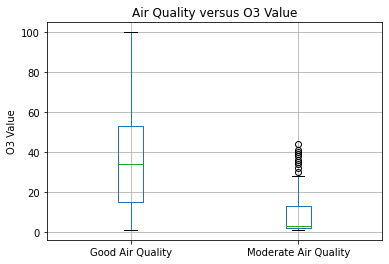

In [76]:
air_quality_o3.loc[:, ['Good Air Quality', 'Moderate Air Quality']].boxplot()
plt.title('Air Quality versus O3 Value')
plt.ylabel('O3 Value')

In [81]:
air_quality_o3.describe()

,O3 Value,Good Air Quality,Moderate Air Quality
count,4101.000000,3996.000000,105.000000
mean,34.082907,34.734735,9.276190
std,22.960687,22.831980,11.002181
min,1.000000,1.000000,1.000000
25%,14.000000,15.000000,2.000000
50%,34.000000,34.000000,3.000000
75%,52.000000,53.000000,13.000000
max,100.000000,100.000000,44.000000


In [86]:
# The figure above showed that there are two categories 
# Hence, two way t-test is the approprate way to do the hypothesis testing
from scipy.stats import ttest_ind
scipy.stats.ttest_ind(gaq.dropna(), baq.dropna(), equal_var=False)

# Results in the rejection of null hypothesis

Ttest_indResult(statistic=22.473494753735945, pvalue=2.0910803909920662e-46)

In [99]:
scipy.stats.ttest_ind(air_quality_o3.loc[:,['Good Air Quality']].dropna(), air_quality_o3.loc[:,['Moderate Air Quality']].dropna(), equal_var=False)

Ttest_indResult(statistic=array([22.47349475]), pvalue=array([2.09108039e-46]))

In [21]:
aqo3good = air_quality_o3[air_quality_o3['Air Quality'] == 'Good']
aqo3mod = air_quality_o3[air_quality_o3['Air Quality'] == 'Moderate']

In [87]:
air_quality_no2 = air_quality_gm.loc[:, ['Air Quality','NO2 Value']]
air_quality_no2 = air_quality_no2.dropna()

In [88]:
air_quality_no2.head()

,Air Quality,NO2 Value
0,Good,84.0
1,Moderate,113.0
2,Good,73.0
3,Good,86.0
4,Good,69.0


In [90]:
no2gaq = air_quality_no2[(air_quality_no2['NO2 Value'] >= 1) & (air_quality_no2['Air Quality'] == 'Good')]
no2maq = air_quality_no2[(air_quality_no2['NO2 Value'] >= 1) & (air_quality_no2['Air Quality'] == 'Moderate')]

In [91]:
air_quality_no2["Good Air Quality"] = no2gaq['NO2 Value']
air_quality_no2["Moderate Air Quality"] = no2maq['NO2 Value']

Text(0, 0.5, 'NO2 Value')

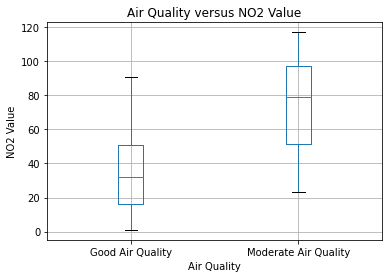

In [94]:
air_quality_no2.loc[:, ['Good Air Quality', 'Moderate Air Quality']].boxplot()
plt.title('Air Quality versus NO2 Value')
plt.xlabel('Air Quality')
plt.ylabel('NO2 Value')

In [98]:
scipy.stats.ttest_ind(air_quality_no2.loc[:,['Good Air Quality']].dropna(), air_quality_no2.loc[:,['Moderate Air Quality']].dropna(), equal_var=False)

Ttest_indResult(statistic=array([-17.75252356]), pvalue=array([1.36639203e-36]))

In [103]:
air_quality_pm = air_quality_gm.loc[:, ['Air Quality','PM10 Value']]
air_quality_pm = air_quality_pm.dropna()

In [104]:
air_quality_pm.describe()

,PM10 Value
count,3647.000000
mean,16.590074
std,8.065424
min,2.000000
25%,10.000000
50%,15.000000
75%,22.000000
max,44.000000


In [127]:
pm10gaq = air_quality_pm[(air_quality_pm['PM10 Value'] >= 1) & (air_quality_pm['Air Quality'] == 'Good')]
pm10maq = air_quality_pm[(air_quality_pm['PM10 Value'] >= 1) & (air_quality_pm['Air Quality'] == 'Moderate')]
air_quality_pm["PM10 Good Air Quality"] = pm10gaq['PM10 Value']
air_quality_pm["PM10 Moderate Air Quality"] = pm10maq['PM10 Value']

In [109]:
air_quality_pm.describe()

,PM10 Value,Good Air Quality,Moderate Air Quality
count,3647.000000,3524.000000,123.000000
mean,16.590074,15.994325,33.658537
std,8.065424,7.357500,8.769198
min,2.000000,2.000000,9.000000
25%,10.000000,10.000000,28.000000
50%,15.000000,15.000000,37.000000
75%,22.000000,21.000000,39.000000
max,44.000000,36.000000,44.000000


Text(0, 0.5, 'PM10 Value')

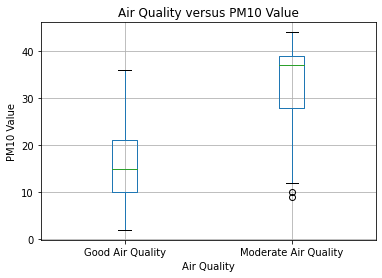

In [107]:
air_quality_pm.loc[:, ['Good Air Quality', 'Moderate Air Quality']].boxplot()
plt.title('Air Quality versus PM10 Value')
plt.xlabel('Air Quality')
plt.ylabel('PM10 Value')

In [108]:
scipy.stats.ttest_ind(air_quality_pm.loc[:,['Good Air Quality']].dropna(), air_quality_pm.loc[:,['Moderate Air Quality']].dropna(), equal_var=False)

Ttest_indResult(statistic=array([-22.07069716]), pvalue=array([1.79566094e-45]))

In [111]:
reduced = air_quality_pm.loc[:,['Good Air Quality']].dropna().sample(100)
reduced2 = air_quality_pm.loc[:,['Moderate Air Quality']].dropna().sample(100)

In [113]:
scipy.stats.ttest_ind(reduced, reduced2)

Ttest_indResult(statistic=array([-16.05547322]), pvalue=array([1.06760599e-37]))

In [119]:
air_quality_tot = pd.DataFrame()
air_quality_tot['O3 Good Value'] = Good_Air_Quality['O3 Value']
air_quality_tot['O3 Moderate Value'] = Moderate_Air_Quality['O3 Value']
air_quality_tot['NO2 Good Value'] = no2gaq['NO2 Value']
air_quality_tot['NO2 Moderate Value'] = no2maq['NO2 Value']
air_quality_tot['PM10 Good Value'] = pm10gaq['PM10 Value']
air_quality_tot['PM10 Moderate Value'] = pm10maq['PM10 Value']

air_quality_tot

,O3 Good Value,O3 Moderate Value,NO2 Good Value,NO2 Moderate Value,PM10 Good Value,PM10 Moderate Value
2,10.0,NaN,73.0,NaN,NaN,NaN
3,2.0,NaN,86.0,NaN,NaN,NaN
4,7.0,NaN,69.0,NaN,NaN,NaN
5,11.0,NaN,57.0,NaN,23.0,NaN
7,58.0,NaN,3.0,NaN,25.0,NaN
...,...,...,...,...,...,...
5738,8.0,NaN,65.0,NaN,22.0,NaN
5739,10.0,NaN,57.0,NaN,NaN,NaN
5740,32.0,NaN,31.0,NaN,21.0,NaN
5741,40.0,NaN,20.0,NaN,15.0,NaN
